In [7]:
import doscoe_lp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
import seaborn as sns
%reload_ext autoreload
%autoreload 2

In [8]:
runs = {}

for fuel_cost in tnrange(2, 15, 1):
    print(fuel_cost)
    lp = doscoe_lp.DOSCOE(gas_fuel_cost=fuel_cost)
    lp.solve()
    runs[fuel_cost] = lp 

/Users/AnnieDillon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  This is separate from the ipykernel package so we can avoid doing imports until


2
Solver found optimal solution.
3
Solver found optimal solution.
4
Solver found optimal solution.
5
Solver found optimal solution.
6
Solver found optimal solution.
7
Solver found optimal solution.
8
Solver found optimal solution.
9
Solver found optimal solution.
10
Solver found optimal solution.
11
Solver found optimal solution.
12
Solver found optimal solution.
13
Solver found optimal solution.
14
Solver found optimal solution.



In [9]:
resources = runs[fuel_cost].resources.index

resource_capacity_lists = {}
for resource in resources:
    resource_capacity_lists[resource] = []
    
resource_gen_lists = {}
for resource in resources:
    resource_gen_lists[resource] = []   

In [10]:
fuel_costs = []
for key in runs:
    fuel_costs.append(key)
    capacity_breakdown = runs[key].capacity_results()
    for resource in resources:
        capacity = capacity_breakdown[resource]
        resource_capacity_lists[resource].append(capacity)
    gen_breakdown = runs[key].gen_results()
    for resource in resources:
        gen = gen_breakdown[resource]
        resource_gen_lists[resource].append(gen) 

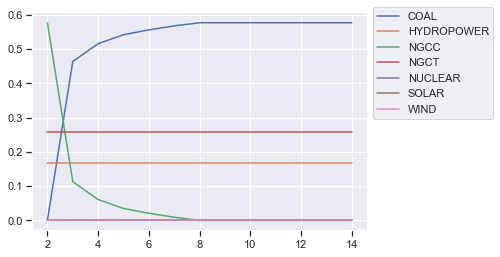

In [11]:
lines = []
fig, ax = plt.subplots()
for resource in resources:
    capacity_line = resource_capacity_lists[resource]
    plt.plot(fuel_costs, capacity_line, label = str(resource)) 

sns.set()
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.77))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
